In [40]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [41]:
#os.getcwd()
#os.chdir('C:/Users/HP/Desktop')
#warnings.filterwarnings("ignore")

In [42]:
df=pd.read_csv("data.csv")

In [43]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [44]:
df.shape

(100000, 28)

In [45]:
df=df.drop_duplicates(subset=["Customer_ID"])
df.shape
df.drop(["ID","Customer_ID","Name", "SSN","Type_of_Loan"],axis=1,inplace=True)
df.shape

(12500, 23)

In [46]:
df1=pd.get_dummies(df)
df1.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,1,23,19114.12,1824.843333,3,4,3,4,3,7,...,0,0,0,1,0,0,0,1,0,0
8,1,28,34847.84,3037.986667,2,4,6,1,3,4,...,0,0,0,0,0,0,1,0,0,1
16,1,34,143162.64,12187.220000,1,5,8,3,5,8,...,0,0,0,1,0,0,0,1,0,0
24,1,54,30689.89,2612.490833,2,5,4,1,0,6,...,0,0,0,0,1,0,0,0,0,1
32,1,21,35547.71,2853.309167,7,5,5,0,5,15,...,1,0,1,0,0,0,0,0,0,1


In [47]:
df1.drop(["Occupation_Writer","Credit_Mix_Standard","Payment_of_Min_Amount_NM",
       "Payment_Behaviour_Low_spent_Small_value_payments","Credit_Score_Standard"],axis=1,inplace=True)

In [48]:
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12500 entries, 0 to 99992
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Month                                               12500 non-null  int64  
 1   Age                                                 12500 non-null  int64  
 2   Annual_Income                                       12500 non-null  float64
 3   Monthly_Inhand_Salary                               12500 non-null  float64
 4   Num_Bank_Accounts                                   12500 non-null  int64  
 5   Num_Credit_Card                                     12500 non-null  int64  
 6   Interest_Rate                                       12500 non-null  int64  
 7   Num_of_Loan                                         12500 non-null  int64  
 8   Delay_from_due_date                                 12500 non-null  int64  


In [49]:
dep=df1["Monthly_Balance"]
ind=df1.drop(["Monthly_Balance"],axis=1)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ind,dep,train_size=0.75)

The value of R-Square is 0.6326


122.77830092071623

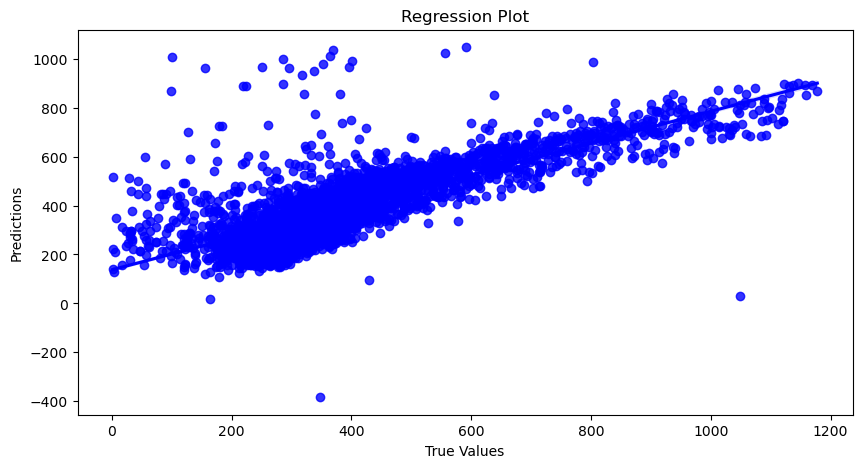

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
r2=r2_score(y_test,pred)
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=pred, color="blue")
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Regression Plot')
plt.savefig('linear_regression_plot.png')  # Save the plot as an image
print("The value of R-Square is",round(r2,4))
mean_squared_error(y_test,pred, squared=False)

In [52]:
df2=df

In [53]:
df2=df
df2.drop(["Occupation","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour"],axis=1,inplace=True)
df2["Credit_Score"].replace({"Good":1,"Standard":2,"Poor":3},inplace=True)
df2=pd.get_dummies(df2)
df2.head()


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,1,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4,809.98,26.822620,265,49.574949,21.465380,312.494089,1
8,1,28,34847.84,3037.986667,2,4,6,1,3,4,5.42,2,605.03,24.464031,319,18.816215,39.684018,470.690627,2
16,1,34,143162.64,12187.220000,1,5,8,3,5,8,7.10,3,1303.01,28.616735,213,246.992320,168.413703,1043.315978,1
24,1,54,30689.89,2612.490833,2,5,4,1,0,6,1.99,4,632.46,26.544229,207,16.415452,29.393311,433.604773,2
32,1,21,35547.71,2853.309167,7,5,5,0,5,15,2.58,4,943.86,39.797764,368,0.000000,37.643638,288.605522,2


In [54]:
dep_var=df2.iloc[:,18:]
ind_var=df2.iloc[:,0:18]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ind_var,dep_var,train_size=0.75)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model=model.fit(x_train,y_train)
pred=model.predict(x_test)

D:\New folder (2)\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder (2)\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
matrix=confusion_matrix(y_test,pred)
score=accuracy_score(y_test,pred)
report=classification_report(y_test,pred)
print("The model accuracy score is %.4f"%score)
print("The confusion matrix is give as follows/n")
print(matrix)
print("The classification report is \n")
print(report)

The model accuracy score is 0.5750
The confusion matrix is give as follows/n
[[  23  452    0]
 [  50 1446  267]
 [   5  554  328]]
The classification report is 

              precision    recall  f1-score   support

           1       0.29      0.05      0.08       475
           2       0.59      0.82      0.69      1763
           3       0.55      0.37      0.44       887

    accuracy                           0.58      3125
   macro avg       0.48      0.41      0.40      3125
weighted avg       0.53      0.58      0.53      3125



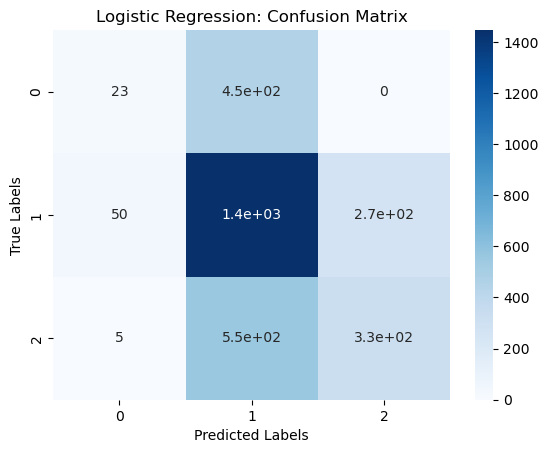

In [57]:
# Save the confusion matrix plot
plt.figure()
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression: Confusion Matrix')
plt.savefig('logistic_regression_confusion_matrix.png')